In [1]:
from burstfit.fit import BurstFit
from burstfit.data import BurstData
from burstfit.model import Model, SgramModel
from burstfit.utils.plotter import plot_me
from burstfit.utils.functions import gauss_norm2, pulse_fn_vec, sgram_fn_vec, gauss_norm
from burstfit.io import BurstIO
import logging

In [2]:
logging_format = "%(asctime)s - %(funcName)s -%(name)s - %(levelname)s - %(message)s"
logging.basicConfig(
    level=logging.INFO,
    format=logging_format,
)

# Loading the data 

In [3]:
import tempfile
from urllib.request import urlretrieve

In [4]:
temp_dir = tempfile.TemporaryDirectory()
download_path = str(temp_dir.name) + "/FRB180417.fil"
url = "https://zenodo.org/record/3905426/files/FRB180417.fil"
urlretrieve(
    url, download_path,
)
fil_file = download_path

# Get candidate cutout and preprocess

### BurstData class

In [5]:
bd = BurstData(
    fp=fil_file,
    dm=475.28400,
    tcand=2.0288800,
    width=2,
    snr=16.8128,
    min_samp=256,
)

#### Crop the relevant time window. Dedisperse the data. Normalise the data to zero mean and unit standard deviation. Apply RFI masks (if any) and RFI filtering (if activated). 

In [6]:
bd.prepare_data()

2021-03-12 18:31:50,149 - prepare_data -burstfit.data - INFO - Preparing data for burst fitting.
2021-03-12 18:31:50,160 - crop_dedispersed_data -burstfit.data - INFO - Cropping data with time_window: 0.2s.
2021-03-12 18:31:50,161 - normalise_data -burstfit.data - INFO - Normalising data using off pulse mean and std.
2021-03-12 18:31:50,165 - normalise_data -burstfit.data - INFO - Off pulse mean and std are: (127.98158986433457, 18.365628141947383)


Using <class 'str'>:
/tmp/tmp9z4rzxd6/FRB180417.fil

#### This is how the data looks

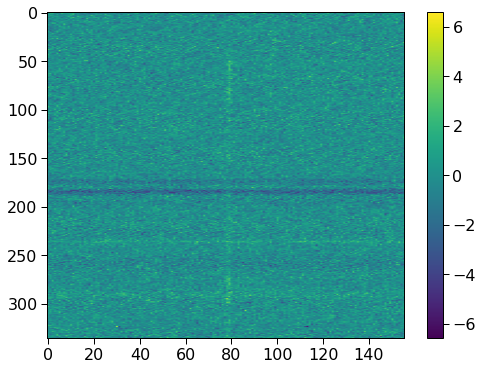

In [7]:
plot_me(bd.sgram)

# Fitting using BurstFit

#### BurstFit fits the spectrogram. It requires three functions: profile function, spectra function and spectrogram function. It is assumed that spectrogram function will use profile and spectra functions to make the spectrogram.   

#### Use the Model class to make profile and spectra models and give names to input parameters. 

In [8]:
pnames = ['S', 'mu_t', 'sigma_t', 'tau']
pulseModel = Model(pulse_fn_vec, param_names=pnames)

snames = ['mu_f', 'sigma_f']
spectraModel = Model(gauss_norm, param_names=snames)

#### Now we create a SgramModel using the above two models

In [9]:
sgramModel = SgramModel(pulseModel, spectraModel, sgram_fn_vec, 
                        mask=bd.mask, clip_fac=bd.clip_fac)

#### Provide basic candidate information to BurstFit: sgram, model, DM, width, etc 

In [10]:
bf = BurstFit(
    sgram_model=sgramModel,
    sgram=bd.sgram,
    width=bd.width,
    dm=bd.dm,
    foff=bd.foff,
    fch1=bd.fch1,
    tsamp=bd.tsamp,
    clip_fac=bd.clip_fac,
    mask=bd.mask) 

#### Fitting the data can be done by fitall()

2021-03-12 18:31:50,908 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2021-03-12 18:31:50,909 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2021-03-12 18:31:50,917 - tests -root - INFO - P values: T-test (0.65766), Kruskal (0.71932), KS (0.59128), F-test (0.29584)
2021-03-12 18:31:50,918 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (L) test
2021-03-12 18:31:50,926 - tests -root - INFO - P values: T-test (0.00000), Kruskal (0.00000), KS (0.00000), F-test (0.00053)
2021-03-12 18:31:50,927 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (R) test
2021-03-12 18:31:50,934 - tests -root - INFO - P values: T-test (0.00000), Kruskal (0.00000), KS (0.00000), F-test (0.00309)
2021-03-12 18:31:50,935 - fitcycle -burstfit.fit - INFO - Fitting component 1.
2021-03-12 18:31:50,938 - initial_profilefit -burstfit.fit - INFO - Running initial profile fit for component: 1
2021-03-12 18:31:50,984 - initial_profilefi

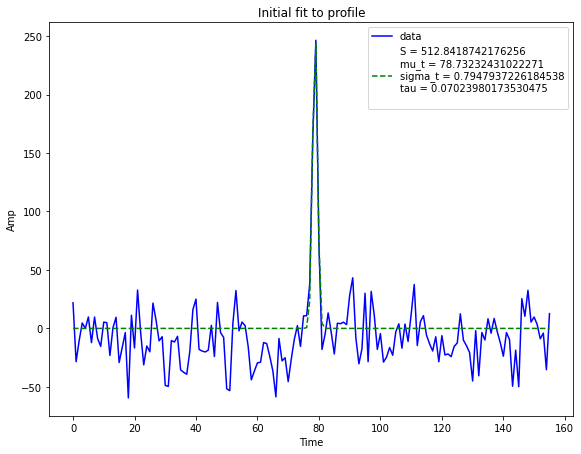

2021-03-12 18:31:51,307 - make_spectra -burstfit.fit - INFO - Making spectra using profile fit parameters.
2021-03-12 18:31:51,308 - initial_spectrafit -burstfit.fit - INFO - Running spectra profile fit for component: 1
2021-03-12 18:31:51,321 - initial_spectrafit -burstfit.fit - INFO - Converged parameters (spectra fit) are:
2021-03-12 18:31:51,321 - initial_spectrafit -burstfit.fit - INFO - mu_f: 299.8622159664497 +- 15.64622961586148
2021-03-12 18:31:51,322 - initial_spectrafit -burstfit.fit - INFO - sigma_f: 68.27149144964595 +- 10.524321434257567


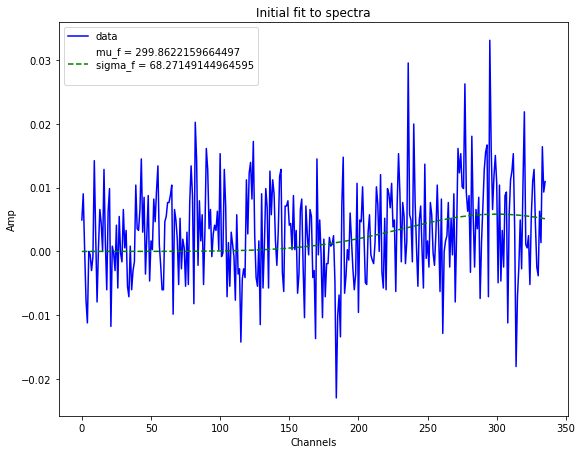

2021-03-12 18:31:51,567 - sgram_fit -burstfit.fit - INFO - Running sgram profile fit for component: 1
2021-03-12 18:31:51,568 - sgram_fit -burstfit.fit - INFO - initial estimate for parameters: [299.8622159664497, 68.27149144964595, 512.8418742176256, 78.73232431022271, 0.7947937226184538, 0.07023980173530475, 475.284]
2021-03-12 18:31:51,901 - sgram_fit -burstfit.fit - INFO - Converged parameters are:
2021-03-12 18:31:51,902 - sgram_fit -burstfit.fit - INFO - mu_f: 1534.7218167022465 +- 15581.01205834671
2021-03-12 18:31:51,903 - sgram_fit -burstfit.fit - INFO - sigma_f: 877.130695501071 +- 5043.481360702697
2021-03-12 18:31:51,903 - sgram_fit -burstfit.fit - INFO - S: 11238.494797163012 +- 218108.20711029993
2021-03-12 18:31:51,904 - sgram_fit -burstfit.fit - INFO - mu_t: 79.07907758603417 +- 0.06085757421707285
2021-03-12 18:31:51,905 - sgram_fit -burstfit.fit - INFO - sigma_t: 0.7788034353914925 +- 0.0031230343762619446
2021-03-12 18:31:51,906 - sgram_fit -burstfit.fit - INFO - tau

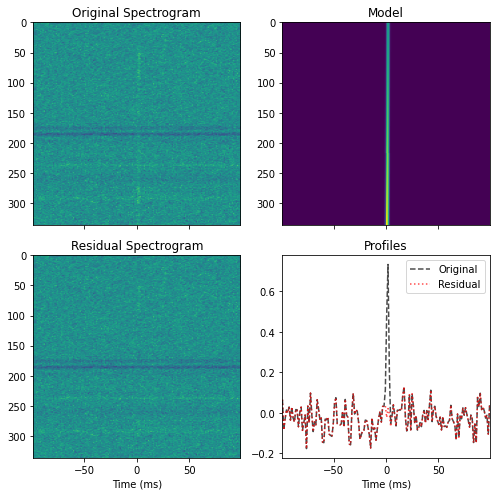

2021-03-12 18:31:52,611 - model -burstfit.fit - INFO - Making model.
2021-03-12 18:31:52,612 - model -burstfit.fit - INFO - Found 1 components.
2021-03-12 18:31:52,616 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2021-03-12 18:31:52,616 - get_off_pulse_region -burstfit.fit - INFO - Using sgram fit parameters.
2021-03-12 18:31:52,618 - model -burstfit.fit - INFO - Making model.
2021-03-12 18:31:52,618 - model -burstfit.fit - INFO - Found 1 components.
2021-03-12 18:31:52,623 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 1.0048251789841864
2021-03-12 18:31:52,623 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2021-03-12 18:31:52,624 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2021-03-12 18:31:52,628 - tests -root - INFO - P values: T-test (0.65766), Kruskal (0.71932), KS (0.59128), F-test (0.29584)
2021-03-12 18:31:52,628 - run

In [11]:
bf.fitall(plot=True)

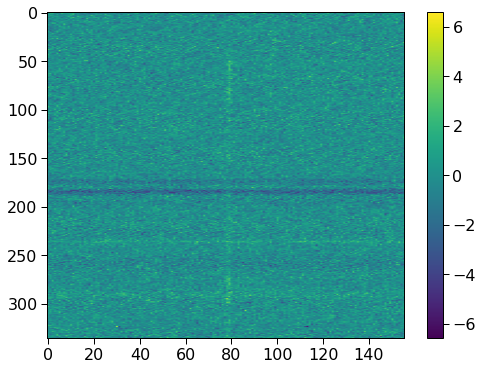

In [12]:
plot_me(bf.sgram)

#### There clearly are two components in the spectra. Let's modify our spectra model and use two gaussians to model this. 

In [13]:
pnames = ['S', 'mu_t', 'sigma_t', 'tau']
pulseModel = Model(pulse_fn_vec, param_names=pnames)

snames = ['mu_f1', 'sigma_f1', 'mu_f2', 'sigma_f2', 'amp']
spectraModel2 = Model(gauss_norm2, param_names=snames)

# I am also giving it some spectra bounds so it get easier for curve_fit to 
# identify region of interest for the two components
spectra_bounds = ([0, 0, 200, 0, 0], [100, 50, 300, 50, 1])
sgramModel2 = SgramModel(pulseModel, spectraModel2, sgram_fn_vec, 
                        mask=bd.mask, clip_fac=bd.clip_fac)

In [14]:
bf2 = BurstFit(
    sgram_model=sgramModel2,
    sgram=bd.sgram,
    width=bd.width,
    dm=bd.dm,
    foff=bd.foff,
    fch1=bd.fch1,
    tsamp=bd.tsamp,
    clip_fac=bd.clip_fac,
    mask=bd.mask) 

2021-03-12 18:31:53,103 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2021-03-12 18:31:53,103 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2021-03-12 18:31:53,108 - tests -root - INFO - P values: T-test (0.65766), Kruskal (0.71932), KS (0.59128), F-test (0.29584)
2021-03-12 18:31:53,108 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (L) test
2021-03-12 18:31:53,113 - tests -root - INFO - P values: T-test (0.00000), Kruskal (0.00000), KS (0.00000), F-test (0.00053)
2021-03-12 18:31:53,113 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (R) test
2021-03-12 18:31:53,117 - tests -root - INFO - P values: T-test (0.00000), Kruskal (0.00000), KS (0.00000), F-test (0.00309)
2021-03-12 18:31:53,118 - fitall -burstfit.fit - WARNING - Input spectra bounds detected. Using them for component 1
2021-03-12 18:31:53,118 - fitcycle -burstfit.fit - INFO - Fitting component 1.
2021-03-12 18:31:53,119 - initial_profi

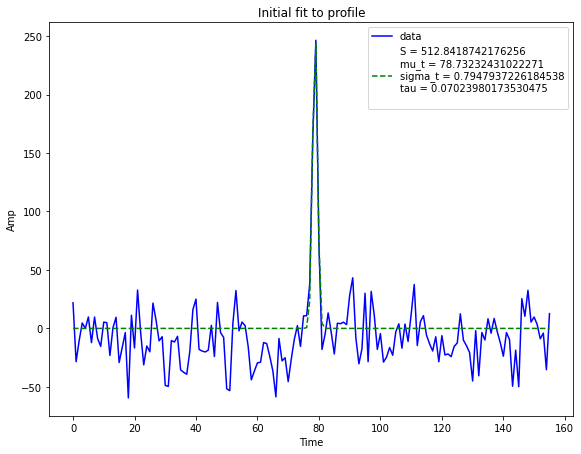

2021-03-12 18:31:53,570 - make_spectra -burstfit.fit - INFO - Making spectra using profile fit parameters.
2021-03-12 18:31:53,571 - initial_spectrafit -burstfit.fit - INFO - Running spectra profile fit for component: 1
2021-03-12 18:31:53,588 - initial_spectrafit -burstfit.fit - INFO - Converged parameters (spectra fit) are:
2021-03-12 18:31:53,589 - initial_spectrafit -burstfit.fit - INFO - mu_f1: 87.72708851306162 +- 14.657344144023687
2021-03-12 18:31:53,589 - initial_spectrafit -burstfit.fit - INFO - sigma_f1: 40.38070079339924 +- 14.56794385561647
2021-03-12 18:31:53,590 - initial_spectrafit -burstfit.fit - INFO - mu_f2: 284.84651913292134 +- 9.334720624356743
2021-03-12 18:31:53,590 - initial_spectrafit -burstfit.fit - INFO - sigma_f2: 41.23788107637332 +- 9.291859540498173
2021-03-12 18:31:53,590 - initial_spectrafit -burstfit.fit - INFO - amp: 0.3497407333338407 +- 0.09115810205812795


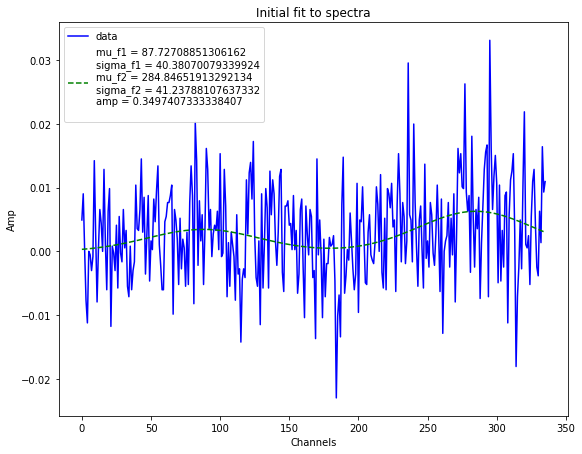

2021-03-12 18:31:53,921 - sgram_fit -burstfit.fit - INFO - Running sgram profile fit for component: 1
2021-03-12 18:31:53,922 - sgram_fit -burstfit.fit - INFO - initial estimate for parameters: [87.72708851306162, 40.38070079339924, 284.84651913292134, 41.23788107637332, 0.3497407333338407, 512.8418742176256, 78.73232431022271, 0.7947937226184538, 0.07023980173530475, 475.284]
2021-03-12 18:31:54,336 - sgram_fit -burstfit.fit - INFO - Converged parameters are:
2021-03-12 18:31:54,337 - sgram_fit -burstfit.fit - INFO - mu_f1: 74.6600995552445 +- 3.148966015198683
2021-03-12 18:31:54,337 - sgram_fit -burstfit.fit - INFO - sigma_f1: 29.08997449280042 +- 3.1735652932670435
2021-03-12 18:31:54,337 - sgram_fit -burstfit.fit - INFO - mu_f2: 282.0987558671014 +- 6.1593569158810695
2021-03-12 18:31:54,338 - sgram_fit -burstfit.fit - INFO - sigma_f2: 48.04757054335587 +- 6.826533560258564
2021-03-12 18:31:54,338 - sgram_fit -burstfit.fit - INFO - amp: 0.4123476364901036 +- 0.036921986314662335
2

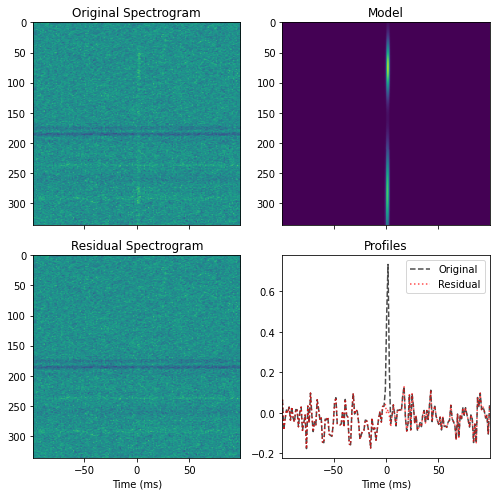

2021-03-12 18:31:55,041 - model -burstfit.fit - INFO - Making model.
2021-03-12 18:31:55,042 - model -burstfit.fit - INFO - Found 1 components.
2021-03-12 18:31:55,047 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2021-03-12 18:31:55,048 - get_off_pulse_region -burstfit.fit - INFO - Using sgram fit parameters.
2021-03-12 18:31:55,050 - model -burstfit.fit - INFO - Making model.
2021-03-12 18:31:55,051 - model -burstfit.fit - INFO - Found 1 components.
2021-03-12 18:31:55,057 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 1.003115392773371
2021-03-12 18:31:55,057 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2021-03-12 18:31:55,058 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2021-03-12 18:31:55,063 - tests -root - INFO - P values: T-test (0.65766), Kruskal (0.71932), KS (0.59128), F-test (0.29584)
2021-03-12 18:31:55,064 - run_

In [15]:
# We can similarly give profile bounds if needed. For this one we don't need to use that. 
bf2.fitall(plot=True, spectra_bounds=spectra_bounds, profile_bounds=[])

In [16]:
# here are the parameters: 
bf2.sgram_params['all']

{1: {'popt': [74.6600995552445,
   29.08997449280042,
   282.0987558671014,
   48.04757054335587,
   0.4123476364901036,
   555.8960256802608,
   79.02660306937426,
   0.7844582964946152,
   0.07026178702689054,
   474.5754998470141],
  'perr': array([3.14896602e+00, 3.17356529e+00, 6.15935692e+00, 6.82653356e+00,
         3.69219863e-02, 4.25662741e+01, 5.27862895e-02, 6.74550540e-03,
         6.22071524e-04, 1.20954734e-01])}}

#### and voila! Both the components are fitted nicely and the residual sgram looks like noise. 
#### The tests show that on pulse residual looked like off pulse region. So the fitting was terminated. 
#### You can save the fitted parameters using BurstIO class. See this notebook.